In [1]:
from scipy.io import loadmat
from scipy.io import savemat
from scipy.stats import kurtosis, skew, entropy
from scipy import signal
import pandas as pd
import numpy as np

mdata = loadmat('dataset/sample_wave.mat')['sample_wave']

Fs = 256
t_range = np.arange(0, 4, 1/Fs)
f_range = np.arange(0, 128, 0.25)
blink_types = mdata.dtype.names # voluntary & involuntary

feature_names = [
    'fp1_mean',
    'fp1_median',
    'fp1_min',
    'fp1_max',
    'fp1_range',
    'fp1_kurtosis',
    'fp1_skew',
    # 'fp1_entropy',
    'fp2_mean',
    'fp2_median',
    'fp2_min',
    'fp2_max',
    'fp2_range',
    'fp2_kurtosis',
    'fp2_skew',
    # 'fp2_entropy',


    'fp1_delta_mean',
    'fp1_delta_min',
    'fp1_delta_max',
    'fp1_delta_range',
    'fp1_theta_mean',
    # 'fp1_theta_min',
    # 'fp1_theta_max',
    # 'fp1_theta_range',
    # 'fp1_alpha_mean',
    # 'fp1_beta_mean',
    # 'fp1_gamma_mean',
    'fp2_delta_mean',
    'fp2_delta_min',
    'fp2_delta_max',
    'fp2_delta_range',
    'fp2_theta_mean',
    # 'fp2_theta_min',
    # 'fp2_theta_max',
    # 'fp2_theta_range',
    # 'fp2_alpha_mean',
    # 'fp2_beta_mean',
    # 'fp2_gamma_mean',
    'blink'
]
eeg_bands = {'delta': (0, 4),
             'theta': (4, 8),
             'alpha': (8, 12),
             'beta': (12, 30),
             'gamma': (30, 45)}
features = pd.DataFrame(columns=feature_names)
features['blink'] = features['blink'].astype(int)

for blink_type in blink_types:

    signals = mdata[blink_type][0,0]
    epochs = signals.dtype.names # individual epoch struct

    for epoch in epochs:
        fp1 = signals[epoch][0,0][0]
        fp2 = signals[epoch][0,0][1]


        hist_fp1 = np.histogram(fp1, bins=100, density=True)[0]
        hist_fp1 += 1e-12
        hist_fp2 = np.histogram(fp2, bins=100, density=True)[0]
        hist_fp2 += 1e-12

        f, psd = signal.welch(fp1, Fs, nperseg=1024)

        psd = 10 * np.log10(psd)

        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp1_delta_mean = np.mean(psd[f_delta_indices])
        fp1_delta_min = np.min(psd[f_delta_indices])
        fp1_delta_max = np.max(psd[f_delta_indices])
        fp1_delta_range = fp1_delta_max - fp1_delta_min

        fp1_theta_mean = np.mean(psd[f_theta_indices])
        fp1_theta_min = np.min(psd[f_theta_indices])
        fp1_theta_max = np.max(psd[f_theta_indices])
        fp1_theta_range = fp1_theta_max - fp1_theta_min

        fp1_alpha_mean = np.mean(psd[f_alpha_indices])
        fp1_beta_mean = np.mean(psd[f_beta_indices])
        fp1_gamma_mean = np.mean(psd[f_gamma_indices])

        f, psd = signal.welch(fp2, Fs, nperseg=1024)
        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp2_delta_mean = np.mean(psd[f_delta_indices])
        fp2_delta_min = np.min(psd[f_delta_indices])
        fp2_delta_max = np.max(psd[f_delta_indices])
        fp2_delta_range = fp2_delta_max - fp2_delta_min

        fp2_theta_mean = np.mean(psd[f_theta_indices])
        fp2_theta_min = np.min(psd[f_theta_indices])
        fp2_theta_max = np.max(psd[f_theta_indices])
        fp2_theta_range = fp2_theta_max - fp2_theta_min

        fp2_alpha_mean = np.mean(psd[f_alpha_indices])
        fp2_beta_mean = np.mean(psd[f_beta_indices])
        fp2_gamma_mean = np.mean(psd[f_gamma_indices])

        new_record = {
            'fp1_mean': np.mean(fp1),
            'fp1_median': np.median(fp1),
            'fp1_min': np.min(fp1),
            'fp1_max': np.max(fp1),
            'fp1_var': np.var(fp1),
            'fp1_range': np.max(fp1)- np.min(fp1),
            'fp1_kurtosis': kurtosis(fp1),
            'fp1_skew': skew(fp1),
            # 'fp1_entropy': entropy(hist_fp1),
            'fp2_mean': np.mean(fp2),
            'fp2_median': np.median(fp2),
            'fp2_min': np.min(fp2),
            'fp2_max': np.max(fp2),
            'fp2_var': np.var(fp2),
            'fp2_range': np.max(fp2)- np.min(fp2),
            'fp2_kurtosis': kurtosis(fp2),
            'fp2_skew': skew(fp2),
            # 'fp2_entropy': entropy(hist_fp2),

            'fp1_delta_mean': fp1_delta_mean,
            'fp1_delta_min': fp1_delta_min,
            'fp1_delta_max': fp1_delta_max,
            'fp1_delta_range': fp1_delta_range,
            'fp1_theta_mean': fp1_theta_mean,
            # 'fp1_theta_min': fp1_delta_min,
            # 'fp1_theta_max': fp1_delta_max,
            # 'fp1_theta_range': fp1_delta_range,
            # 'fp1_alpha_mean': fp1_alpha_mean,
            # 'fp1_beta_mean': fp1_beta_mean,
            # 'fp1_gamma_mean': fp1_gamma_mean,
            'fp2_delta_mean': fp2_delta_mean,
            'fp2_delta_min': fp2_delta_min,
            'fp2_delta_max': fp2_delta_max,
            'fp2_delta_range': fp2_delta_range,
            'fp2_theta_mean': fp2_theta_mean,
            # 'fp2_theta_min': fp2_delta_min,
            # 'fp2_theta_max': fp2_delta_max,
            # 'fp2_theta_range': fp2_delta_range,
            # 'fp2_alpha_mean': fp2_alpha_mean,
            # 'fp2_beta_mean': fp2_beta_mean,
            # 'fp2_gamma_mean': fp2_gamma_mean,
            'blink': int(1) if blink_type == 'voluntary' else int(0),
        }
        features = pd.concat([features, pd.DataFrame([new_record])], ignore_index=True)


In [2]:
features

,fp1_mean,fp1_median,fp1_min,fp1_max,fp1_range,fp1_kurtosis,fp1_skew,fp2_mean,fp2_median,fp2_min,...,fp2_delta_min,fp2_delta_max,fp2_delta_range,fp2_theta_mean,fp2_theta_min,fp2_theta_max,fp2_theta_range,blink,fp1_var,fp2_var
0,0.019418,0.570297,-153.152054,159.161428,312.313482,7.298035,-0.549411,0.020885,0.613362,-164.717140,...,0.000221,270.610774,270.610553,0.611648,0.000221,270.610774,270.610553,1,1486.438554,1719.407826
1,0.035894,0.484288,-96.534364,134.752058,231.286422,9.168062,0.519797,0.038604,0.520858,-103.824036,...,0.003643,160.874791,160.871148,0.857499,0.003643,160.874791,160.871148,1,717.773509,830.270034
2,-0.166985,1.006762,-106.343849,113.392582,219.736431,8.007002,-0.336855,-0.179595,1.082787,-114.374273,...,0.038228,175.911650,175.873422,1.410353,0.038228,175.911650,175.873422,1,678.215396,784.511985
3,-0.331847,0.188234,-105.302602,115.957580,221.260182,5.830864,-0.359368,-0.356906,0.202448,-113.254397,...,0.393883,308.922322,308.528438,0.470305,0.393883,308.922322,308.528438,1,784.584047,907.551776
4,0.019691,0.748899,-105.534091,118.844261,224.378352,7.226644,-0.425924,0.021178,0.805451,-113.503367,...,0.000004,199.521143,199.521139,0.688159,0.000004,199.521143,199.521139,1,738.594188,854.353935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.075876,0.393187,-80.309467,120.125675,200.435142,5.489655,0.333219,-0.077323,0.400683,-81.840374,...,0.055045,234.714028,234.658982,1.003232,0.055045,234.714028,234.658982,0,656.543608,681.813044
857,0.293096,0.044543,-103.551569,142.618844,246.170413,8.273008,0.383580,0.298683,0.045392,-105.525531,...,0.119730,140.964519,140.844789,0.884960,0.119730,140.964519,140.844789,0,868.432769,901.857519
858,-0.456375,1.613479,-132.117488,123.142924,255.260412,4.590602,-0.763368,-0.465074,1.644236,-134.635991,...,0.747666,557.284893,556.537226,0.809334,0.747666,557.284893,556.537226,0,1317.265358,1367.965041
859,-0.276722,0.266537,-69.893409,79.104371,148.997780,4.228456,-0.218180,-0.281997,0.271618,-71.225759,...,0.020305,196.080046,196.059741,0.631763,0.020305,196.080046,196.059741,0,381.863331,396.560711


In [3]:
print(features.dtypes)

fp1_mean           float64
fp1_median         float64
fp1_min            float64
fp1_max            float64
fp1_range          float64
fp1_kurtosis       float64
fp1_skew           float64
fp2_mean           float64
fp2_median         float64
fp2_min            float64
fp2_max            float64
fp2_range          float64
fp2_kurtosis       float64
fp2_skew           float64
fp1_delta_mean     float64
fp1_delta_min      float64
fp1_delta_max      float64
fp1_delta_range    float64
fp1_theta_mean     float64
fp1_theta_min      float64
fp1_theta_max      float64
fp1_theta_range    float64
fp2_delta_mean     float64
fp2_delta_min      float64
fp2_delta_max      float64
fp2_delta_range    float64
fp2_theta_mean     float64
fp2_theta_min      float64
fp2_theta_max      float64
fp2_theta_range    float64
blink                int64
fp1_var            float64
fp2_var            float64
dtype: object


In [4]:
train_x = features.loc[:, features.columns != 'blink']
train_y = features.loc[:, features.columns == 'blink']

In [5]:
from sklearn import preprocessing

def normalize_mms(input_df):
    scaler = preprocessing.MinMaxScaler()
    result = scaler.fit_transform(input_df)
    return pd.DataFrame(result, index=input_df.index, columns=input_df.columns)

# train_x = normalize_mms(train_x)
train_x
train_y

,blink
0,1
1,1
2,1
3,1
4,1
...,...
856,0
857,0
858,0
859,0


C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train acc: 0.7674418604651163
[[228  85]
 [ 75 300]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       313
           1       0.78      0.80      0.79       375

    accuracy                           0.77       688
   macro avg       0.77      0.76      0.76       688
weighted avg       0.77      0.77      0.77       688


Test acc: 0.7109826589595376
[[55 26]
 [24 68]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        81
           1       0.72      0.74      0.73        92

    accuracy                           0.71       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.71      0.71      0.71       173



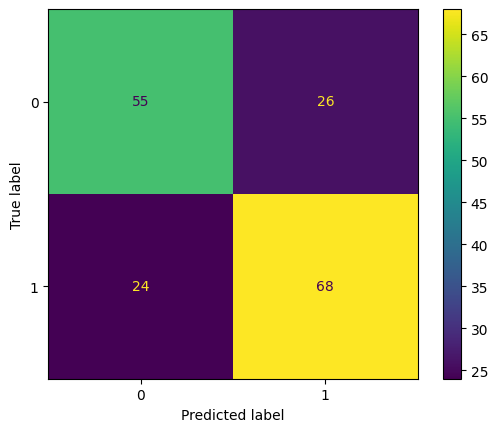

In [6]:
import sys
sys.path.append("../../function")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from function import classification

LR = LogisticRegression(random_state=42)
LR = classification.model_training(train_x, train_y.values.ravel(), LR)

C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7283236994219653
[[58 23]
 [24 68]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        81
           1       0.75      0.74      0.74        92

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173



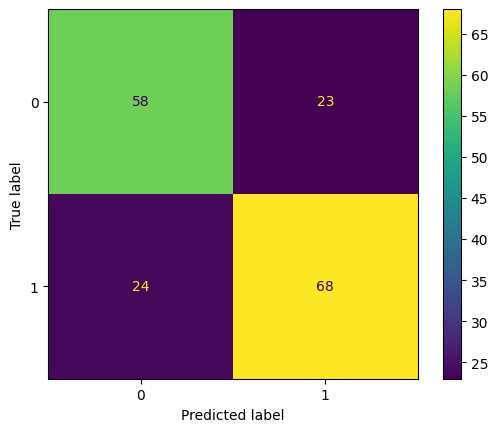

In [7]:
RF = RandomForestClassifier(random_state=42)
RF = classification.model_training(train_x, train_y, RF)

Index(['fp1_mean', 'fp1_median', 'fp1_min', 'fp1_max', 'fp1_range',
       'fp1_kurtosis', 'fp1_skew', 'fp2_mean', 'fp2_median', 'fp2_min',
       'fp2_max', 'fp2_range', 'fp2_kurtosis', 'fp2_skew', 'fp1_delta_mean',
       'fp1_delta_min', 'fp1_delta_max', 'fp1_delta_range', 'fp1_theta_mean',
       'fp1_theta_min', 'fp1_theta_max', 'fp1_theta_range', 'fp2_delta_mean',
       'fp2_delta_min', 'fp2_delta_max', 'fp2_delta_range', 'fp2_theta_mean',
       'fp2_theta_min', 'fp2_theta_max', 'fp2_theta_range', 'fp1_var',
       'fp2_var'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
 False False  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1]


C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7283236994219653
[[59 22]
 [25 67]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.72        81
           1       0.75      0.73      0.74        92

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173



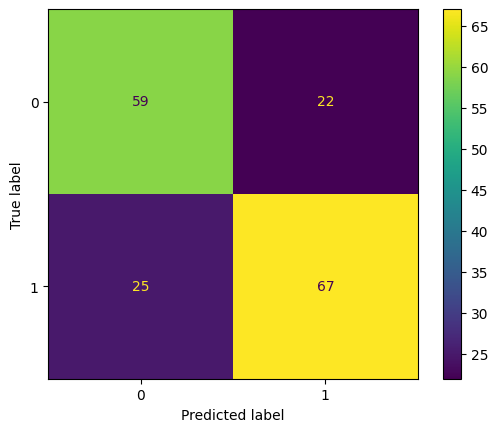

In [8]:
rfe_columns = classification.RFE_analysis(train_x, train_y, RF, n_feature_to_select=0.9)
train_x_rfe = train_x[train_x.columns[rfe_columns]]
RF = classification.model_training(train_x_rfe, train_y, RF)